1) PCA

c:\Users\official\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


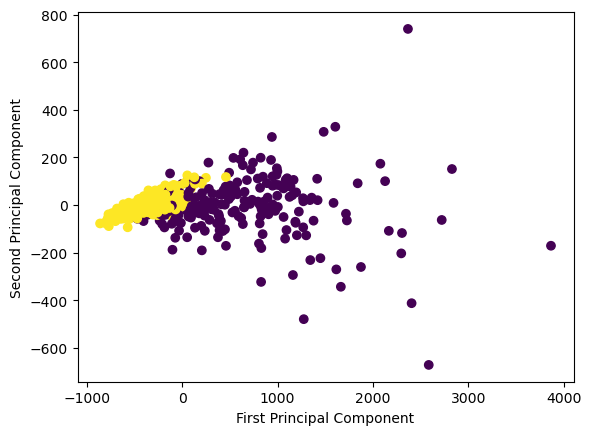

Number of principal components needed to retain 95% of the explained variance: 1


In [1]:
# Load the breast cancer dataset
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Perform PCA with two principal components
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Visualize the transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# Determine the number of principal components needed to retain 95% of the explained variance
import numpy as np
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Number of principal components needed to retain 95% of the explained variance: {n_components_95}")

# Perform PCA with the optimal number of principal components
pca = PCA(n_components=n_components_95)
X_pca = pca.fit_transform(X)



2) A)Decision Tree

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
(303, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
Accuracy: 0.819672131147541
Precision: 0.8387096774193549
Recall: 0.8125
F1 S

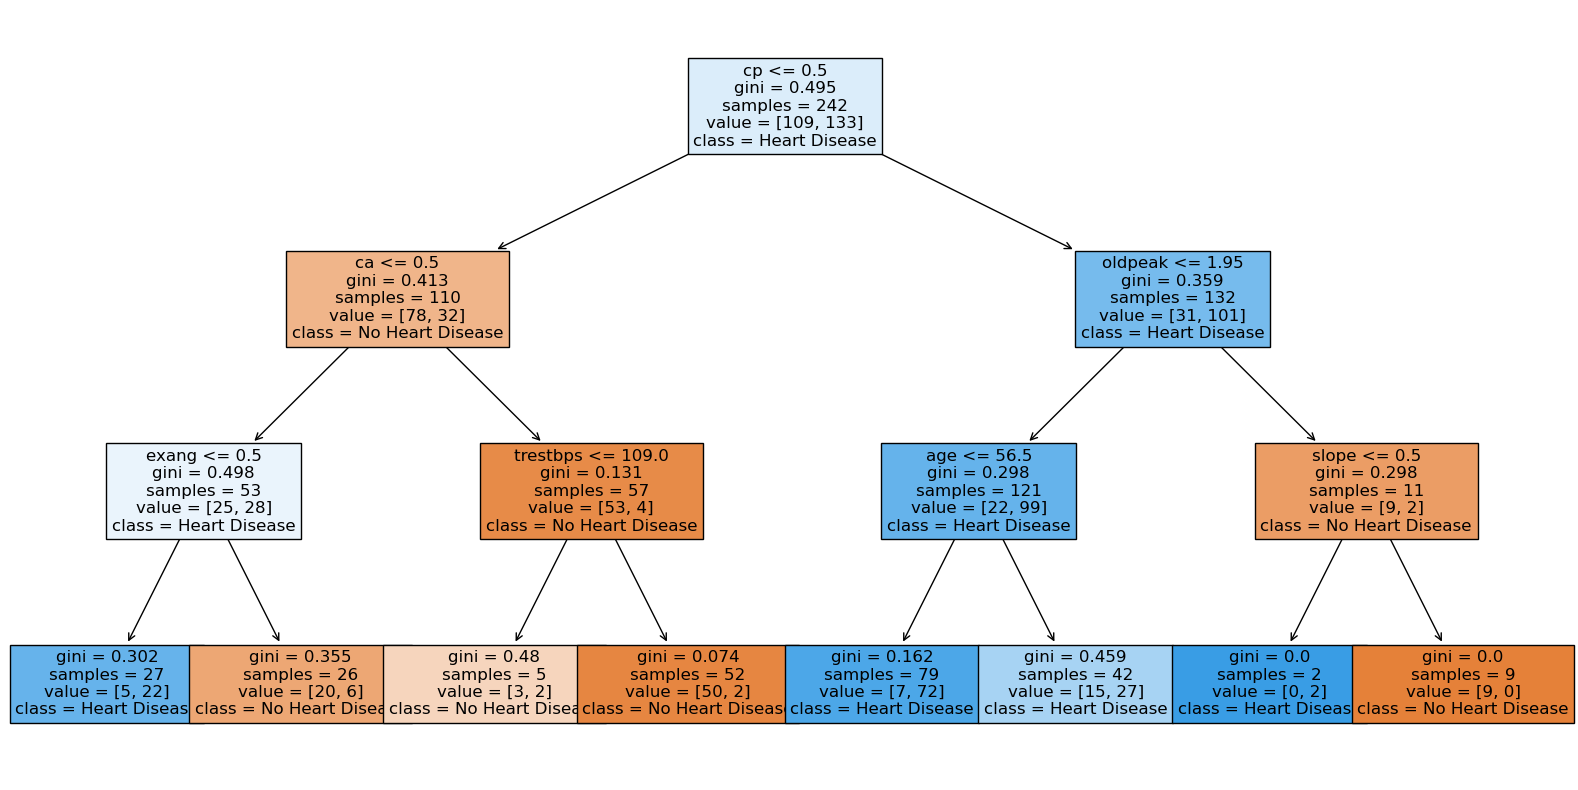

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv('heart.csv')

# Explore the dataset
print(df.head())
print(df.shape)
print(df.dtypes)

# Split the dataset into X (features) and y (target)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the decision tree classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'], filled=True, fontsize=12)
plt.show()


B) Random Forest

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset into a Pandas dataframe
df = pd.read_csv('heart.csv')

# Split the dataset into features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [5]:
from sklearn.preprocessing import StandardScaler

# Scale the features in the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Scale the features in the testing set using the same scaler as the training set
X_test_scaled = scaler.transform(X_test)


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a Random Forest classifier with default hyperparameters
rfc = RandomForestClassifier()

# Fit the model to the training data
rfc.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test_scaled)

# Evaluate the performance of the model on the testing data
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))


Accuracy: 0.7704918032786885
Precision: 0.75
Recall: 0.8
F1-Score: 0.7741935483870969


In [5]:
importances = rfc.feature_importances_

# Get the feature names from the original dataset
feature_names = df.columns[:-1]

# Create a dataframe of feature importances
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the top 5 most important features
print(feature_importances.head(5))


    feature  importance
2        cp    0.148852
7   thalach    0.120095
9   oldpeak    0.114368
11       ca    0.113985
12     thal    0.102593


In [7]:
from sklearn.model_selection import GridSearchCV

# Define a dictionary of hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4, 8]
}

# Create a GridSearchCV object with 10-fold cross-validation
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and their corresponding performance metrics
print('Best Hyperparameters:', grid_search.best_params_)
print('Best Accuracy:', grid_search.best_score_)


Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 8, 'n_estimators': 50}
Best Accuracy: 0.8428333333333334
